In [2]:
import pandas as pd 
import numpy as np

In [53]:
from matplotlib import pyplot

In [3]:
base = pd.read_csv('dataset_SCL.csv')
base.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8144\3935152703.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


Analisis Exploratorio 

In [102]:
base.shape

(68206, 18)

In [64]:
anno=pd.DataFrame({'count' : base.groupby("AÑO").size()}).reset_index()
anno.head()


,AÑO,count
0,2017.0,68164
1,2018.0,2


<BarContainer object of 2 artists>

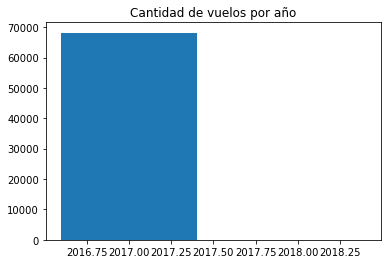

In [67]:
pyplot.title("Cantidad de vuelos por año")
pyplot.bar(anno["AÑO"], height=anno["count"])

Para el año 2017 se realizaron un total de 68.165 vuelos y solo para el año 2018 se realizaron 2 vuelos

In [19]:
anno_mes=base.groupby(['AÑO', 'MES']).size()
anno_mes=anno_mes.reset_index()
anno_mes=pd.pivot_table(anno_mes, columns="AÑO", index="MES", values=0)
anno_mes 

AÑO,2017.0,2018.0
MES,,
1.0,6106.0,2.0
2.0,5561.0,NaN
3.0,5480.0,NaN
4.0,5020.0,NaN
5.0,5240.0,NaN
6.0,4981.0,NaN
7.0,5992.0,NaN
8.0,5743.0,NaN
9.0,5610.0,NaN


In [49]:
6344/68167

0.09306555958161573

<BarContainer object of 12 artists>

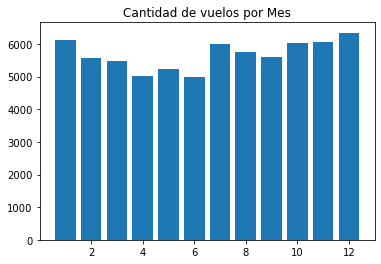

In [68]:
mes=pd.DataFrame({'count' : base.groupby("MES").size()}).reset_index()
pyplot.title("Cantidad de vuelos por Mes")
pyplot.bar(mes["MES"], height=mes["count"])

Como podemos observar aproximadamente se realizan minimo 5 mil vuelos en cada uno de los meses del año 2017 y solo se realizaron dos vuelos en el mes de enero de 2018. El mes donde se presentan mas vuelos es en Diciembre (9.3%)

In [22]:
dia_semana=base.groupby('DIANOM').size()
dia_semana

DIANOM
Domingo       9796
Jueves       10237
Lunes        10130
Martes        9652
Miercoles     9721
Sabado        8352
Viernes      10279
dtype: int64

<BarContainer object of 7 artists>

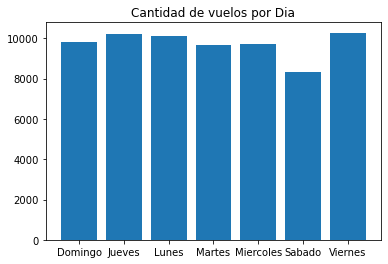

In [69]:
dia=pd.DataFrame({'count' : base.groupby("DIANOM").size()}).reset_index()
pyplot.title("Cantidad de vuelos por Dia")
pyplot.bar(dia["DIANOM"], height=dia["count"])

Se puede observar que los dias donde se presentan la mayor cantidad de vuelos son los dias jueves, viernes y lunes

In [23]:
ciudad_origen=base.groupby('SIGLAORI').size()
ciudad_origen

SIGLAORI
Santiago    68167
dtype: int64

Todos los vuelos tienen como ciudad de origen Santiago

In [39]:
ciudad_destino=base.groupby('SIGLADES').size().sort_values(ascending=False)
ciudad_destino

SIGLADES
Buenos Aires        6335
Antofagasta         5786
Lima                5270
Calama              5146
Puerto Montt        4357
Concepcion          3993
Iquique             3747
Sao Paulo           3569
Temuco              2589
Arica               2436
La Serena           2410
Punta Arenas        2105
Ciudad de Panama    1850
Copiapo             1780
Mendoza             1625
Bogota              1604
Rio de Janeiro      1435
Montevideo          1066
Cordoba             1023
Miami               1016
Madrid               894
Balmaceda            839
Valdivia             753
Ciudad de Mexico     700
Isla de Pascua       452
Guayaquil            422
Nueva York           382
Auckland N.Z.        361
Paris                359
Atlanta              358
Dallas               357
Houston              334
Toronto              283
Roma                 259
Osorno               259
Castro (Chiloe)      235
Asuncion             232
La Paz               209
Londres              205
Sydney          

In [37]:
((6335+5786+5270+5146)/68167)*100

33.0614520222395

Se osberva que la mayor cantidad de vuelos tienen como destino Buenos Aires, Antofagasta, Lima y Calama (33% del total de los vuelos corresponde a estas 4 ciudades de destino)

In [42]:
aerolinea=base.groupby('OPERA').size().sort_values(ascending=False)
aerolinea

OPERA
Grupo LATAM                 40854
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1673
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        278
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
dtype: int64

In [48]:
print(40854/68167)
print(14298/68167)

0.5993222527029207
0.20974958557659865


se observa que la aerolinea con mas vuelos es el Grupo LATAM con un 59.9% del total de los vuelos y la aerolinea Sky Airline tiene un 20.9% del total de los vuelos

In [40]:
TIPOVUELO=base.groupby('TIPOVUELO').size().sort_values()
TIPOVUELO

TIPOVUELO
I    31201
N    36966
dtype: int64

In [45]:
36966/68167

0.5422858567928763

Vemos que el 54.2% de los vuelos son Nacionales y el 45.8% son vuelos internacionales 

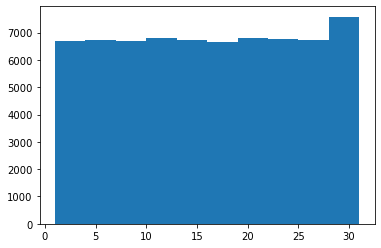

In [44]:
plt.hist(base['DIA'])
plt.show()

In [43]:
DIA=base.groupby('DIA').size()
DIA

DIA
1.0     2207
2.0     2222
3.0     2269
4.0     2215
5.0     2239
6.0     2273
7.0     2263
8.0     2211
9.0     2226
10.0    2281
11.0    2237
12.0    2281
13.0    2271
14.0    2219
15.0    2238
16.0    2267
17.0    2226
18.0    2160
19.0    2238
20.0    2289
21.0    2265
22.0    2271
23.0    2259
24.0    2230
25.0    2179
26.0    2265
27.0    2285
28.0    2230
29.0    2043
30.0    2019
31.0    1289
dtype: int64

Observamos que en todos los dias del mes se realizan minimo 2 mil vuelo y no se presentan valores atipicos en este comportamiento

Creacion Nuevas Variables

In [4]:
base.dtypes

Fecha-I       object
Vlo-I         object
Ori-I         object
Des-I         object
Emp-I         object
Fecha-O       object
Vlo-O         object
Ori-O         object
Des-O         object
Emp-O         object
DIA          float64
MES          float64
AÑO          float64
DIANOM        object
TIPOVUELO     object
OPERA         object
SIGLAORI      object
SIGLADES      object
dtype: object

In [5]:
base.dropna(inplace = True)
base["Fecha-I"]= base["Fecha-I"].str.split(",",  expand = True)

In [6]:
base["Fecha-I"]= pd.to_datetime(base["Fecha-I"], format='%Y-%m-%d %H:%M')
base["Fecha-O"]= pd.to_datetime(base["Fecha-O"], format='%Y-%m-%d %H:%M')

Creacion Variable dif_min y atraso_15

In [7]:

base["dif_min"]=(base["Fecha-O"]-base["Fecha-I"]).astype('timedelta64[m]')
base["atraso_15"] = pd.Series(np.where((base['dif_min'] >= 15) , 1, 0))


Creacion Variable Temporada Alta

In [13]:
base["temporada_alta"] =  pd.Series(np.where((base['Fecha-I'] >= "2017-12-15") & (base['Fecha-I'] <= "2017-03-03") |\
                                             (base['Fecha-I'] >= "2017-07-15") & (base['Fecha-I'] <= "2017-07-31") |\
                                             (base['Fecha-I'] >= "2017-09-11") & (base['Fecha-I'] <= "2017-09-30"), 1, 0))

Creacion Variable Periodo dia

In [16]:
base["periodo_dia"] = pd.Series(np.where((base["Fecha-I"].dt.hour.astype(int) >= 5) &  (base["Fecha-I"].dt.hour.astype(int) < 12), "mañana",
                                np.where((base["Fecha-I"].dt.hour.astype(int) >= 12) & (base["Fecha-I"].dt.hour.astype(int) < 19), "tarde","noche")))

Falta Exportar

Analisis tasa de atraso con variables 

Atraso Vs Destino

In [28]:
atraso_destino=base.groupby(['atraso_15', 'SIGLADES']).size()
atraso_destino=atraso_destino.reset_index()
atraso_destino=pd.pivot_table(atraso_destino, columns="atraso_15", index="SIGLADES", values=0).sort_values(by=0,ascending=False)
atraso_destino 

atraso_15,0.0,1.0
SIGLADES,,
Antofagasta,4852.0,934.0
Buenos Aires,4575.0,1760.0
Calama,4456.0,690.0
Lima,3982.0,1281.0
Puerto Montt,3542.0,815.0
Concepcion,3330.0,663.0
Iquique,3055.0,692.0
Sao Paulo,2598.0,971.0
Temuco,2119.0,448.0


In [41]:
#Filtro Destinos mas representativos
values=["Antofagasta","Buenos Aires","Calama","Lima","Puerto Montt","Concepcion","Iquique","Sao Paulo","Temuco","Arica"]
filtro=base[base.SIGLADES.isin(values)]
filtro.pivot_table(index = "SIGLADES", values = "atraso_15")


,atraso_15
SIGLADES,
Antofagasta,0.161424
Arica,0.151888
Buenos Aires,0.277822
Calama,0.134085
Concepcion,0.166041
Iquique,0.184681
Lima,0.243397
Puerto Montt,0.187055
Sao Paulo,0.272065


conclusiones

Atraso Vs Aerolinea

In [44]:
atraso_aeroli=base.groupby(['atraso_15', 'OPERA']).size()
atraso_aeroli=atraso_aeroli.reset_index()
atraso_aeroli=pd.pivot_table(atraso_aeroli, columns="atraso_15", index="OPERA", values=0).sort_values(by=0,ascending=False)
atraso_aeroli 

atraso_15,0.0,1.0
OPERA,,
Grupo LATAM,32883,7971
Sky Airline,11570,2728
Copa Air,1724,126
Aerolineas Argentinas,1437,512
Latin American Wings,995,678
JetSmart SPA,857,198
Avianca,835,317
American Airlines,664,93
Gol Trans,494,312


In [47]:
#Filtro Destinos mas representativos
values=["Grupo LATAM","Sky Airline", "Copa Air", "Aerolineas Argentinas", "Latin American Wings", "JetSmart SPA"]
filtro=base[base.OPERA.isin(values)]
filtro.pivot_table(index = "OPERA", values = "atraso_15")

,atraso_15
OPERA,
Aerolineas Argentinas,0.262699
Copa Air,0.068108
Grupo LATAM,0.195109
JetSmart SPA,0.187678
Latin American Wings,0.405260
Sky Airline,0.190796


CONCLUSIONES

Atraso Vs Mes

In [48]:
base.pivot_table(index = "MES", values = "atraso_15")

,atraso_15
MES,
1.0,0.176682
2.0,0.161482
3.0,0.124270
4.0,0.129482
5.0,0.171183
6.0,0.185706
7.0,0.312917
8.0,0.187010
9.0,0.186809


Conclusiones

Atraso Vs Dia semana

In [49]:
base.pivot_table(index = "DIANOM", values = "atraso_15")

,atraso_15
DIANOM,
Domingo,0.200838
Jueves,0.196559
Lunes,0.201778
Martes,0.196601
Miercoles,0.188349
Sabado,0.215141
Viernes,0.199942


conclusiones

Atraso Vs Temporada

In [51]:
atraso_tempo=base.groupby(['atraso_15', 'temporada_alta']).size()
atraso_tempo=atraso_tempo.reset_index()
atraso_tempo=pd.pivot_table(atraso_tempo, columns="atraso_15", index="temporada_alta", values=0).sort_values(by=0,ascending=False)
atraso_tempo 

atraso_15,0.0,1.0
temporada_alta,,
0.0,49479,11961
1.0,5051,1635


In [50]:
base.pivot_table(index = "temporada_alta", values = "atraso_15")

,atraso_15
temporada_alta,
0.0,0.194678
1.0,0.244541


conclusiones

Atraso Vs Tipo Vuelo

In [52]:
base.pivot_table(index = "TIPOVUELO", values = "atraso_15")

,atraso_15
TIPOVUELO,
I,0.24120
N,0.16441


CONCLUSIONES